<a href="https://colab.research.google.com/github/AndrewLoweUoM/lake_district/blob/main/Flow_Duration_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This python script produces a Flow Duration Curve (FDC). Flow duration curves visualise the distribution of flow values and used to understand the probability of exceeding certain flow rates.

The code reads flow data from a CSV file, sorts it, calculates the cumulative probability, and then plots the flow duration curve using matplotlib. The steps are:

1. **Importing Libraries**: The code begins by importing necessary libraries: `pandas` for data manipulation and `matplotlib.pyplot` for plotting.

2. **Reading Flow Data**: The flow data is read from a CSV file named `'flow_data.csv'` using the `pd.read_csv()` function from pandas. The assumption here is that the CSV file contains at least two columns: one for the flow values and another for dates.

3. **Sorting Flow Data**: The flow data is sorted in descending order based on the flow values using the `sort_values()` method from pandas. This sorting is needed for creating the flow duration curve.

4. **Calculating Cumulative Probability**: The cumulative probability of each flow value is calculated using the formula `(index + 1) / total_count`, where `index` is the position of the flow value in the sorted dataset and `total_count` is the total number of data points.

5. **Plotting Flow Duration Curve**:
   - A new figure is created with a specified size using `plt.figure()`.
   - The flow duration curve is plotted using `plt.plot()` with cumulative probability on the x-axis and flow values on the y-axis. The `marker` argument specifies the marker style for data points, and `linestyle` specifies the line style connecting the points.
   - Title, x-label, and y-label are added using `plt.title()`, `plt.xlabel()`, and `plt.ylabel()`, respectively.
   - The x-axis scale is set to logarithmic using `plt.xscale('log')`. This is a common practice for flow duration curves to better represent the wide range of flow values.
   - Grid lines are added to the plot using `plt.grid()` to aid in readability.
   - The x-axis is inverted using `plt.gca().invert_xaxis()`, so the exceedance probability is displayed from high to low.

6. **Displaying Plot**: Finally, the plot is displayed using `plt.show()`.


Mounted at /content/drive/
        Time  Predicted Flow S60  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
328    82.00               0.913         NaN         NaN         NaN   
327    81.75               0.912         NaN         NaN         NaN   
329    82.25               0.912         NaN         NaN         NaN   
326    81.50               0.908         NaN         NaN         NaN   
330    82.50               0.908         NaN         NaN         NaN   
...      ...                 ...         ...         ...         ...   
2184  546.00               0.010         NaN         NaN         NaN   
2185  546.25               0.010         NaN         NaN         NaN   
2197  549.25               0.009         NaN         NaN         NaN   
2196  549.00               0.009         NaN         NaN         NaN   
2198  549.50               0.009         NaN         NaN         NaN   

      Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Cumulative Probability  
328          NaN         NaN 

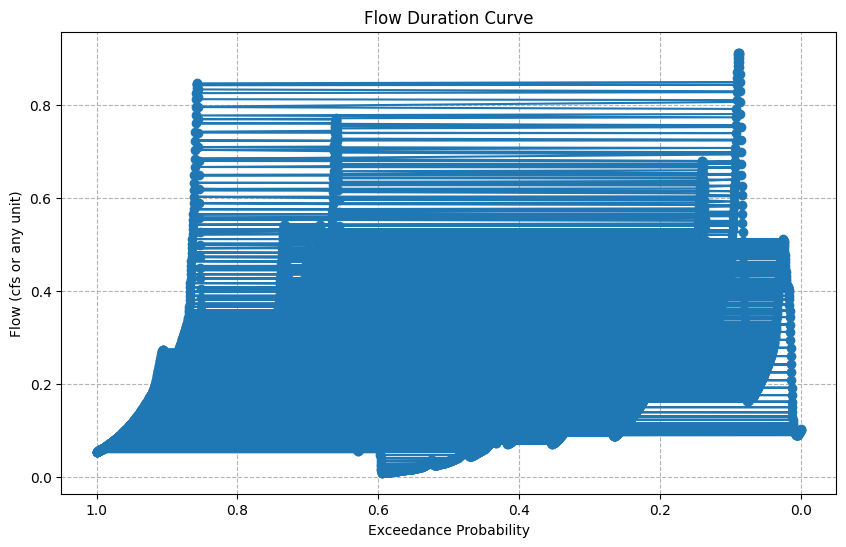

In [ ]:
from google.colab import drive # used in Google Colab notebooks to mount Google Drive.
import pandas as pd
import matplotlib.pyplot as plt


# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the climate data CSV file from Google Drive (files in folder 'Previous Input Files)
file_path = '/content/drive/MyDrive/dataset/TS_2018_ReFH.csv'

# Read flow data from CSV file
flow_data = pd.read_csv(file_path)

# Sort flow data in descending order
flow_data.sort_values(by='Predicted Flow S60', ascending=False, inplace=True)


# Calculate cumulative probability
flow_data['Cumulative Probability'] = (flow_data.index + 1) / len(flow_data)

print(flow_data)

# Plot flow duration curve
plt.figure(figsize=(10, 6))
plt.plot(flow_data['Cumulative Probability'], flow_data['Predicted Flow S60'], marker='o', linestyle='-')
plt.title('Flow Duration Curve')
plt.xlabel('Exceedance Probability')
plt.ylabel('Flow (cfs or any unit)')
plt.xscale('log')  # Log scale for x-axis
plt.grid(True, which="both", ls="--", color='0.7')
plt.gca().invert_xaxis()  # Invert x-axis to show exceedance probability from high to low
plt.show()


A summary of the steps to produce a flow duration curve (FDC). These steps outline the process of reading, processing, plotting, and saving flow data from a CSV file:

1. **Imports**:
   - `import numpy as np`: Import NumPy library.
   - `from google.colab import drive`: Import the `drive` module from the `google.colab` package.
   - `import pandas as pd`: Import the pandas library.
   - `import matplotlib.pyplot as plt`: Import the pyplot module from the matplotlib library.

2. **Mounting Google Drive**:
   - Mount Google Drive to access files stored in it.

3. **Reading Flow Data**:
   - Define the file path for the CSV file containing flow data.
   - Read the flow data from the CSV file using pandas `pd.read_csv()`.

4. **Data Processing and Plotting**:
   - Extract the predicted flow values from the flow data.
   - Sort the flow values in descending order using NumPy's `np.sort()` function.
   - Calculate the exceedance probability using NumPy's `np.arange()` function.
   - Plot the flow duration curve using matplotlib's `plt.plot()` function.

5. **Saving Results**:
   - Create a pandas DataFrame containing the exceedance probability and predicted flow values.
   - Save the DataFrame to a CSV file using `pd.DataFrame.to_csv()` method.

6. **Confirmation**:
   - Print a confirmation message indicating that the file was saved successfully.


Mounted at /content/drive/


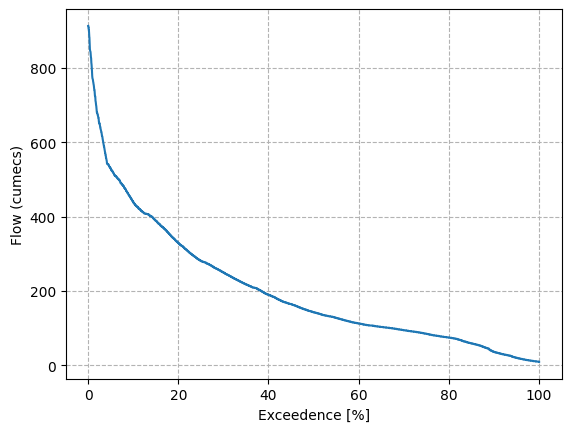

File saved successfully!


In [ ]:
import numpy as np
from google.colab import drive # used in Google Colab notebooks to mount Google Drive.
import pandas as pd
import matplotlib.pyplot as plt


# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the climate data CSV file from Google Drive (files in folder 'Previous Input Files)
file_path = '/content/drive/MyDrive/dataset/TS_2018_ReFH.csv'

# Read flow data from CSV file
flow_data = pd.read_csv(file_path)

data = (flow_data['Predicted Flow S60'])

# Sort both columns of data in descending order
sort = np.sort(data)[::-1]

# Calculate exceedance probaility
exceedence = np.arange(1.,len(sort)+1) / len(sort)

# Plot flow duration curve for both columns
plt.plot(exceedence*100, sort)
plt.xlabel("Exceedence [%]")
plt.ylabel("Flow (cumecs)")
plt.grid(True, which="both", ls="--", color='0.7')
plt.show()

# Write results to csv file and confirm it is saved

results_df = pd.DataFrame({'Exceedence': exceedence, 'Predicted Flow S60': data})
results_df.to_csv('/content/drive/MyDrive/dataset/output/FDC_predQ_2018.csv', index=False, float_format='%.6f')
print("File saved successfully!")


**Plot the observed and predicted FDCs for 2018**

Mounted at /content/drive/


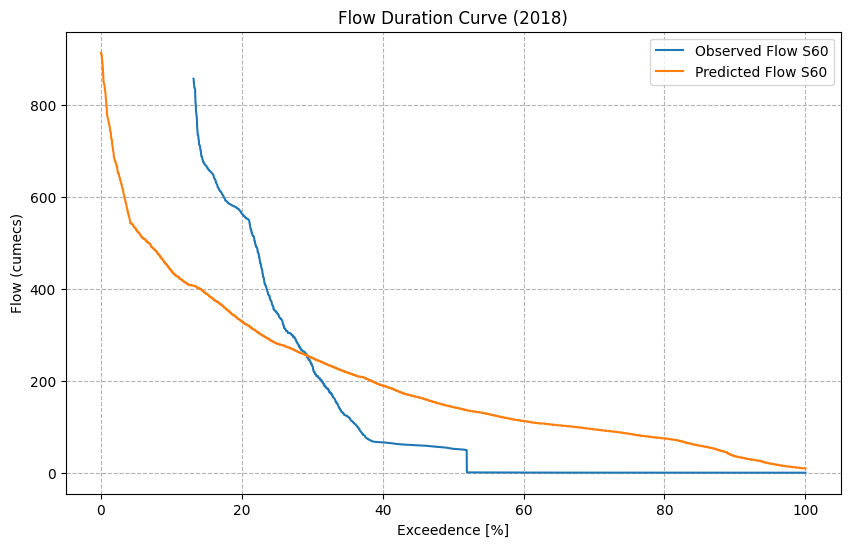

File saved successfully!


In [ ]:
import numpy as np
from google.colab import drive # used in Google Colab notebooks to mount Google Drive.
import pandas as pd
import matplotlib.pyplot as plt


# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the climate data CSV file from Google Drive (files in folder 'Previous Input Files)
file_path = '/content/drive/MyDrive/dataset/TS_2018_ReFH.csv'

# Read flow data from CSV file
flow_data = pd.read_csv(file_path)

# Extract the first and second columns of data
obs_data = (flow_data ['Observed Flow S60'])
pred_data = (flow_data['Predicted Flow S60'])

# Sort both columns of data in descending order
sorted_obs = np.sort(obs_data)[::-1]
sorted_pred = np.sort(pred_data)[::-1]

# Calculate exceedance probaility for both columns
exceedence = np.arange(1.,len(sorted_obs)+1) / len(sorted_obs)

#Plot flow duration curve for both columns
plt.figure(figsize=(10, 6))
plt.plot(exceedence * 100, sorted_obs, label='Observed Flow S60')
plt.plot(exceedence * 100, sorted_pred, label='Predicted Flow S60')
plt.xlabel("Exceedence [%]")
plt.ylabel("Flow (cumecs)")
plt.title("Flow Duration Curve (2018)")
plt.legend()
plt.grid(True, which="both", ls="--", color='0.7')
plt.show()

# Write results to csv file and confirm it is saved

results_df = pd.DataFrame({'Exceedence': exceedence, 'Predicted Flow S60': data})
results_df.to_csv('/content/drive/MyDrive/dataset/output/FDC_Q_2018.csv', index=False, float_format='%.6f')
print("File saved successfully!")